In [1]:
import csv
from xml.etree import ElementTree
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from pyclustertend import hopkins, vat, assess_tendency_by_mean_metric_score
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, minmax_scale, RobustScaler,robust_scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import sklearn.metrics as compute_metrics
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
test_cov_file = None
# test_cov_file = "C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/merged/test_coverage.csv"
# test_cov_file = "C:/Users/aprodea/work/metrics-tax-compare/analysis/last/merged/test_coverage.csv"

true_labels = None
# true_labels = "C:/Users/aprodea/work/metrics-tax-compare/analysis/labelled_data_ext.csv"
# true_labels = "C:/Users/aprodea/work/deloitte-tax-i/analysis/labelled_data_ext.csv"

# save_to_folder = "C:/Users/aprodea/work/metrics-tax-compare/analysis/tag-1.1.1/classification/2_plots/"
# save_to_folder = "C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/classification/2_plots/"
# save_to_folder = "C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/classification/1_plots/"
save_to_folder = "C:/Users/aprodea/work/experiment-projects/sharex/analysis/v12/classification/2_plots/"

def get_labelled_data():
#     file = "C:/Users/aprodea/work/deloitte-tax-i/analysis/last/classification/all_labels.csv"
#     file = "C:/Users/aprodea/work/metrics-tax-compare/analysis/last/classification/all_labels.csv"
#     file = "C:/Users/aprodea/work/metrics-tax-compare/analysis/tag-1.1.1/classification/2_all_labels.csv"
#     file = "C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/classification/2_all_labels.csv"
    file = "C:/Users/aprodea/work/experiment-projects/sharex/analysis/v12/classification/2_all_labels.csv"
    data = pd.read_csv(file, sep=';')
    return data

# complete_data_labels = pd.read_csv("C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/classification/1_all_labels.csv", sep=';')
complete_data_labels = pd.read_csv("C:/Users/aprodea/work/experiment-projects/sharex/analysis/v12/classification/1_all_labels.csv", sep=';')

all_labels = get_labelled_data()
all_labels

,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CLevel_threshold,CLevel_k_means,CLevel_em
0,ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...,2.0,1.0,1,0.0,0.0,5,0,1.0,0.0,low,regular,high
1,ShareX.ScreenCaptureLib.WindowInfo.Activate(),1.0,1.0,0,0.0,0.0,1,2,1.0,0.0,low,low,low
2,ShareX.ScreenCaptureLib.WindowInfo.ToString(),1.0,1.0,0,1.0,0.0,0,1,1.0,0.0,low,low,low
3,ShareX.HelpersLib.CustomToolStripProfessionalR...,2.0,1.0,0,0.0,0.0,2,0,1.0,0.0,low,low,low
4,ShareX.HelpersLib.LabeledComboBox.add_Selected...,1.0,1.0,1,0.0,0.0,1,0,1.0,11.0,regular,regular,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,ShareX.Setup.Program.UploadLatestFile(),5.0,3.0,0,2.0,1.0,1,2,1.0,0.0,low,low,low
3683,ShareX.Setup.Program.Program(),4.0,1.0,0,0.0,0.0,0,0,1.0,0.0,low,low,low
3684,ShareX.NativeMessagingHost.Program.Main(String[]),5.0,3.0,1,2.0,2.0,0,2,5.0,0.0,low,regular,regular
3685,ShareX.NativeMessagingHost.Program.Run(),14.0,6.0,0,10.0,3.0,1,7,8.0,0.0,regular,low,low


In [3]:
list_columns = all_labels.columns.tolist()
str_cols = ['Method', 'CLevel_threshold', 'CLevel_k_means', 'CLevel_em']
list_columns = [col for col in list_columns if col not in str_cols]
list_columns

['LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall']

In [4]:
df = None
if true_labels is not None:
    df_true_labells = pd.read_csv(true_labels, sep=';')
    df_true_labells = df_true_labells[['Method', 'CLevel']]
    df = pd.merge(df_true_labells, all_labels, how='left', on='Method')
    df = df[['Method', 'LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg',
           'NCall', 'CLevel', 'CLevel_threshold', 'CLevel_k_means', 'CLevel_em']]
    # df.to_csv('C:/Users/aprodea/work/deloitte-tax-i/analysis/commit_23-01-20/classification/2_selection_methods_labelled.csv', sep=';', index=False)
df

In [5]:
scaled_data = all_labels.copy()

for col_name in list_columns:
    col = scaled_data[col_name]
    min_col, max_col = col.min(), col.max()
#     min_col = 0  # consider min as 0 to perserve the importance of values; eg LOC 25, 50 -> 0.5, 1 
#     print(col_name, min_col, max_col)
    scaled_data[col_name] = (col - min_col) / (max_col - min_col)
    
scaled_data

,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CLevel_threshold,CLevel_k_means,CLevel_em
0,ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...,0.001148,0.000000,0.090909,0.000000,0.00,0.053763,0.000000,0.00,0.000000,low,regular,high
1,ShareX.ScreenCaptureLib.WindowInfo.Activate(),0.000000,0.000000,0.000000,0.000000,0.00,0.010753,0.009217,0.00,0.000000,low,low,low
2,ShareX.ScreenCaptureLib.WindowInfo.ToString(),0.000000,0.000000,0.000000,0.013514,0.00,0.000000,0.004608,0.00,0.000000,low,low,low
3,ShareX.HelpersLib.CustomToolStripProfessionalR...,0.001148,0.000000,0.000000,0.000000,0.00,0.021505,0.000000,0.00,0.000000,low,low,low
4,ShareX.HelpersLib.LabeledComboBox.add_Selected...,0.000000,0.000000,0.090909,0.000000,0.00,0.010753,0.000000,0.00,0.000007,regular,regular,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,ShareX.Setup.Program.UploadLatestFile(),0.004592,0.015748,0.000000,0.027027,0.05,0.010753,0.009217,0.00,0.000000,low,low,low
3683,ShareX.Setup.Program.Program(),0.003444,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,low,low,low
3684,ShareX.NativeMessagingHost.Program.Main(String[]),0.004592,0.015748,0.090909,0.027027,0.10,0.000000,0.009217,0.04,0.000000,low,regular,regular
3685,ShareX.NativeMessagingHost.Program.Run(),0.014925,0.039370,0.000000,0.135135,0.15,0.010753,0.032258,0.07,0.000000,regular,low,low


In [6]:
scaled_data[list_columns]

,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall
0,0.001148,0.000000,0.090909,0.000000,0.00,0.053763,0.000000,0.00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00,0.010753,0.009217,0.00,0.000000
2,0.000000,0.000000,0.000000,0.013514,0.00,0.000000,0.004608,0.00,0.000000
3,0.001148,0.000000,0.000000,0.000000,0.00,0.021505,0.000000,0.00,0.000000
4,0.000000,0.000000,0.090909,0.000000,0.00,0.010753,0.000000,0.00,0.000007
...,...,...,...,...,...,...,...,...,...
3682,0.004592,0.015748,0.000000,0.027027,0.05,0.010753,0.009217,0.00,0.000000
3683,0.003444,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
3684,0.004592,0.015748,0.090909,0.027027,0.10,0.000000,0.009217,0.04,0.000000
3685,0.014925,0.039370,0.000000,0.135135,0.15,0.010753,0.032258,0.07,0.000000


In [7]:
# sh_list_columns = ['LOC', 'NP', 'Ca', 'Ce', 'NChg']
X = all_labels[list_columns]
X_scaled = StandardScaler().fit_transform(X)

# X_scaled = scaled_data[list_columns]

features = X_scaled.T
cov_matrix = np.cov(features)

values, vectors = np.linalg.eig(cov_matrix)

importance = {}
explained_variances = []
for i in range(len(values)):
    val = values[i] / np.sum(values)
    explained_variances.append(val)
    importance[val] = list_columns[i]
 
print(np.sum(explained_variances), '\n', explained_variances)
dict_keys = list(importance.keys())
dict_keys.sort(reverse = True)
all_in_order = ""
for k in dict_keys:
    all_in_order += importance[k] + "  "
print(all_in_order)
print(dict_keys)

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res.head()

1.0 
 [0.3821493870003921, 0.16175555959944862, 0.01673233283203197, 0.025695816808058963, 0.038210342078710616, 0.05312764220233264, 0.11846504513313653, 0.09747915647582271, 0.10638471787006588]
LOC  CC  Ce  NCall  NChg  Ca  NEST  NV  NP  
[0.3821493870003921, 0.16175555959944862, 0.11846504513313653, 0.10638471787006588, 0.09747915647582271, 0.05312764220233264, 0.038210342078710616, 0.025695816808058963, 0.01673233283203197]


,PC1,PC2
0,-1.117381,-0.311062
1,-1.012856,-0.861452
2,-1.005387,-0.738606
3,-1.153794,-0.719606
4,-1.139315,-0.375823


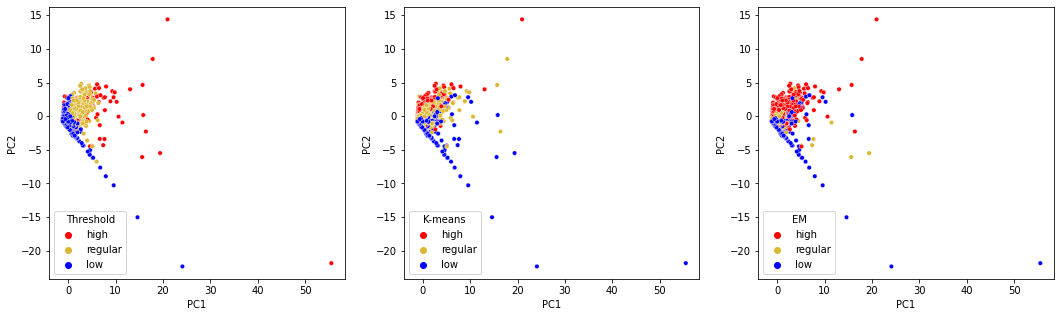

<Figure size 432x288 with 0 Axes>

In [8]:
# plt.figure(figsize=(5,5))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
ax= axes.flatten()
clvls = ['CLevel_threshold', 'CLevel_k_means', 'CLevel_em']
titles = ['Threshold', 'K-means', 'EM']
for i in range(3):
    lvl = clvls[i]
    sns.scatterplot(x=res['PC1'], y=res['PC2'], hue=all_labels[lvl],
              palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
              hue_order=[ "high", "regular","low"], s=20, ax=ax[i])
    ax[i].legend(loc="lower left", title=titles[i])
#     ax[i].set_ylabel(col_name)


plt.show()

# fig.suptitle('Clustering results on the first two principal components')
plt.savefig(save_to_folder + 'pca.pdf', bbox_inches = 'tight', pad_inches = 0)

In [9]:
metrics_list = ['LOC',  'NP', 'Ca', 'Ce', 'NChg']

temp_df = pd.DataFrame()
temp_df["CRank"] = scaled_data[metrics_list].sum(axis=1)
temp_df = temp_df.sort_values(by='CRank', ignore_index=True)
n = temp_df.shape[0]
first_cut = round(n*0.7)
second_cut = round(n*0.9)

print(first_cut, second_cut, n)

temp_df.loc[:first_cut, "CLevel"] = "low"
temp_df.loc[first_cut:second_cut, "CLevel"] = "regular"
temp_df.loc[second_cut:, "CLevel"] = "high"
print(temp_df.describe())
grouped_temp_df = temp_df.groupby('CLevel')
grouped_temp_df.describe()

2581 3318 3687
             CRank
count  3687.000000
mean      0.166144
std       0.137186
min       0.000000
25%       0.090909
50%       0.138528
75%       0.217544
max       2.641063


CRank                                                              \
          count      mean       std       min       25%       50%       75%   
CLevel                                                                        
high      369.0  0.447195  0.200533  0.305372  0.331603  0.395211  0.487128   
low      2581.0  0.104104  0.063862  0.000000  0.043018  0.105834  0.149220   
regular   737.0  0.242693  0.029705  0.207932  0.217544  0.232152  0.268583   

                   
              max  
CLevel             
high     2.641063  
low      0.207932  
regular  0.305357

In [10]:
df = scaled_data.copy()
df = pd.melt(df, id_vars=str_cols, value_vars=list_columns)
df

,Method,CLevel_threshold,CLevel_k_means,CLevel_em,variable,value
0,ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...,low,regular,high,LOC,0.001148
1,ShareX.ScreenCaptureLib.WindowInfo.Activate(),low,low,low,LOC,0.000000
2,ShareX.ScreenCaptureLib.WindowInfo.ToString(),low,low,low,LOC,0.000000
3,ShareX.HelpersLib.CustomToolStripProfessionalR...,low,low,low,LOC,0.001148
4,ShareX.HelpersLib.LabeledComboBox.add_Selected...,regular,regular,regular,LOC,0.000000
...,...,...,...,...,...,...
33178,ShareX.Setup.Program.UploadLatestFile(),low,low,low,NCall,0.000000
33179,ShareX.Setup.Program.Program(),low,low,low,NCall,0.000000
33180,ShareX.NativeMessagingHost.Program.Main(String[]),low,regular,regular,NCall,0.000000
33181,ShareX.NativeMessagingHost.Program.Run(),regular,low,low,NCall,0.000000


In [11]:
scaled_data.describe()

,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall
count,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3.687000e+03
mean,0.008043,0.013585,0.117168,0.037707,0.049146,0.016556,0.011845,0.012531,1.535407e-03
std,0.028141,0.034357,0.109332,0.066221,0.065086,0.037769,0.025088,0.036163,2.002590e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.001148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.002296,0.000000,0.090909,0.013514,0.050000,0.010753,0.004608,0.000000,0.000000e+00
75%,0.006889,0.015748,0.181818,0.040541,0.100000,0.021505,0.013825,0.010000,6.703428e-07
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [12]:
for lvl in ['CLevel_threshold', 'CLevel_k_means', 'CLevel_em']:
    print(lvl)
    l1 = complete_data_labels[lvl]
    l2 = all_labels[lvl]
    
    ari = adjusted_rand_score(l1, l2)
    pr = compute_metrics.precision_score(l1, l2, labels=['high', 'regular', 'low'], average=None)
    acc = compute_metrics.accuracy_score(l1, l2)
    recall = compute_metrics.recall_score(l1, l2, labels=['high', 'regular', 'low'], average=None)
    print('ari: {}  precision: {}, recall: {} accuracy: {}'.format(ari, pr, recall, acc))

CLevel_threshold
ari: 0.36300177167177383  precision: [0.25203252 0.42062415 0.85199535], recall: [0.25203252 0.42062415 0.85199535] accuracy: 0.7057228098725251
CLevel_k_means
ari: 0.1259347272385056  precision: [0.06393862 0.4301701  0.95574388], recall: [0.10121457 0.7241899  0.48035968] accuracy: 0.5427176566314077
CLevel_em
ari: 0.31602078262211525  precision: [0.33957553 0.73635523 0.80278884], recall: [0.54345654 0.42385517 0.99752475] accuracy: 0.5820450230539734


In [13]:
complete_data_labels['CLevel_threshold']

0           low
1           low
2           low
3           low
4           low
         ...   
3682        low
3683        low
3684        low
3685    regular
3686        low
Name: CLevel_threshold, Length: 3687, dtype: object

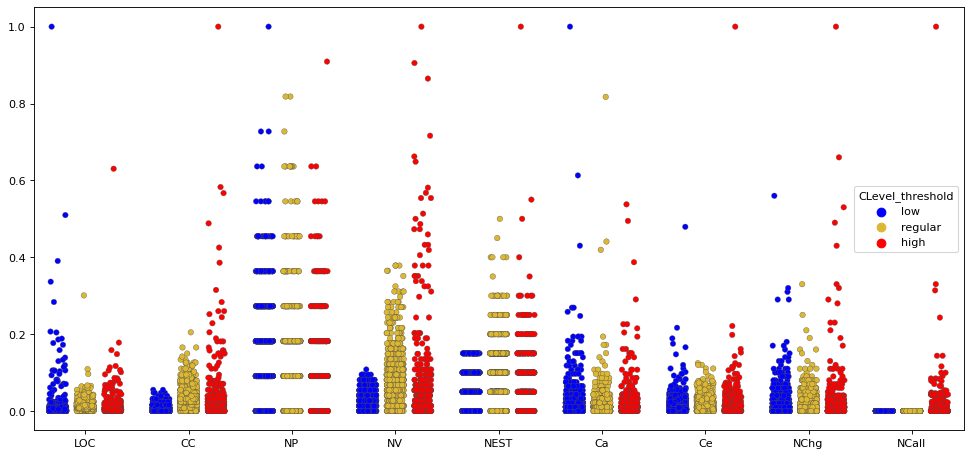

In [14]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)    
sns.stripplot(data=df, x='variable', y='value', hue='CLevel_threshold',
              palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
              hue_order=["low", "regular", "high"],
              jitter=0.25, size=5, ax=ax, linewidth=.3, dodge=True)
# plt.title('Results for the threshold approach')
# plt.show()
plt.xlabel('')
plt.ylabel('')
plt.savefig(save_to_folder + 'threshold.pdf', bbox_inches = 'tight', pad_inches = 0)

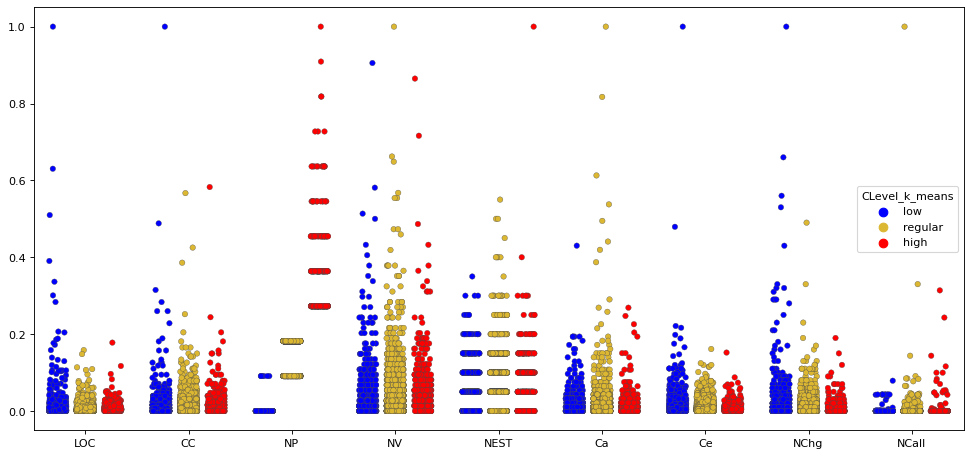

In [15]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)    
sns.stripplot(data=df, x='variable', y='value', hue='CLevel_k_means',
              palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
              hue_order=["low", "regular", "high"],
              jitter=0.25, size=5, ax=ax, linewidth=.3, dodge=True)
# plt.title('Results for the K-means algorithm')
# plt.show()
plt.xlabel('')
plt.ylabel('')

plt.savefig(save_to_folder + 'k-means.pdf', bbox_inches = 'tight', pad_inches = 0)

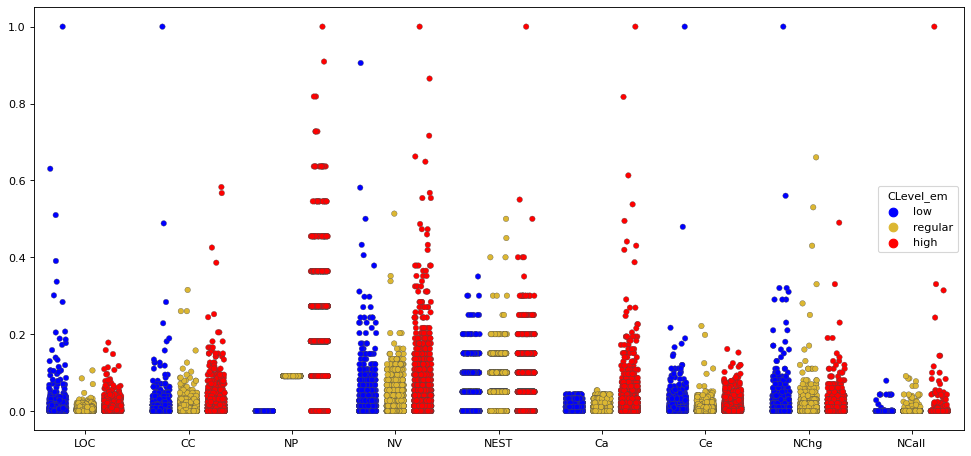

In [16]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)    
sns.stripplot(data=df, x='variable', y='value', hue='CLevel_em',
              palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
              hue_order=["low", "regular", "high"],
              jitter=0.25, size=5, ax=ax, linewidth=.3, dodge=True)
# plt.title('Results for the EM algorithm')
# plt.show()
plt.xlabel('')
plt.ylabel('')
plt.savefig(save_to_folder + 'em.pdf', bbox_inches = 'tight', pad_inches = 0)

In [17]:
if test_cov_file is None:
    test_data = pd.DataFrame(columns = ['Method', 'CoveredStatements', 'TotalStatements'])
else:
    test_data = pd.read_csv(test_cov_file, sep=';')

data_combined = pd.merge(all_labels[str_cols], test_data, on='Method', how='left')

data_combined.isna().sum()

Method                  0
CLevel_threshold        0
CLevel_k_means          0
CLevel_em               0
CoveredStatements    3687
TotalStatements      3687
dtype: int64

Result for threshold approach
low: 0  regular: 0  high: 0  test coverage percetange
Methods number {'Low critical': 2581, 'Regular critical': 737, 'High critical': 369}


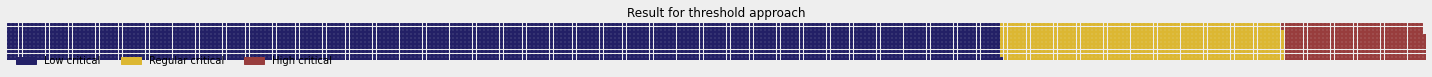

In [18]:
from pywaffle import Waffle

print('Result for threshold approach')

low_ = data_combined[data_combined['CLevel_threshold'] == "low"]
regular_ = data_combined[data_combined['CLevel_threshold'] == "regular"]
high_ = data_combined[data_combined['CLevel_threshold'] == "high"]

if data_combined['TotalStatements'].sum() == 0:
    l_p, r_p, h_p = 0, 0, 0
else:
    l_p = low_['CoveredStatements'].sum()/low_['TotalStatements'].sum()
    r_p = regular_['CoveredStatements'].sum()/regular_['TotalStatements'].sum()
    h_p = high_['CoveredStatements'].sum()/high_['TotalStatements'].sum()

print('low: {}  regular: {}  high: {}  test coverage percetange'.format(l_p, r_p, h_p))

data = {'Low critical': low_.shape[0], 'Regular critical': regular_.shape[0], 'High critical': high_.shape[0]}
print('Methods number', data)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#DCB732", "#983D3D"),
    labels=['Low critical', 'Regular critical', 'High critical'],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    interval_ratio_x=0.5,
    interval_ratio_y=0.5,
    figsize=(20,10)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.title('Result for threshold approach')
plt.show()

Result for k_means algorithm
low: 0  regular: 0  high: 0  test coverage percetange
Methods number {'Low critical': 1062, 'Regular critical': 2234, 'High critical': 391}


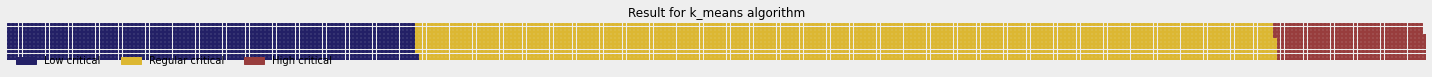

In [19]:
print('Result for k_means algorithm')

low_ = data_combined[data_combined['CLevel_k_means'] == "low"]
regular_ = data_combined[data_combined['CLevel_k_means'] == "regular"]
high_ = data_combined[data_combined['CLevel_k_means'] == "high"]

if data_combined['TotalStatements'].sum() == 0:
    l_p, r_p, h_p = 0, 0, 0
else:
    l_p = low_['CoveredStatements'].sum()/low_['TotalStatements'].sum()
    r_p = regular_['CoveredStatements'].sum()/regular_['TotalStatements'].sum()
    h_p = high_['CoveredStatements'].sum()/high_['TotalStatements'].sum()
print('low: {}  regular: {}  high: {}  test coverage percetange'.format(l_p, r_p, h_p))


data = {'Low critical': low_.shape[0], 'Regular critical': regular_.shape[0], 'High critical': high_.shape[0]}
print('Methods number', data)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#DCB732", "#983D3D"),
    labels=['Low critical', 'Regular critical', 'High critical'],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    interval_ratio_x=0.5,
    interval_ratio_y=0.5,
    figsize=(20,10)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.title('Result for k_means algorithm')
plt.show()

Result for EM algorithm
low: 0  regular: 0  high: 0  test coverage percetange
Methods number {'Low critical': 1004, 'Regular critical': 1081, 'High critical': 1602}


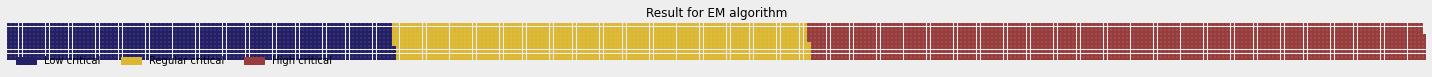

In [20]:
print('Result for EM algorithm')

low_ = data_combined[data_combined['CLevel_em'] == "low"]
regular_ = data_combined[data_combined['CLevel_em'] == "regular"]
high_ = data_combined[data_combined['CLevel_em'] == "high"]

if data_combined['TotalStatements'].sum() == 0:
    l_p, r_p, h_p = 0, 0, 0
else:
    l_p = low_['CoveredStatements'].sum()/low_['TotalStatements'].sum()
    r_p = regular_['CoveredStatements'].sum()/regular_['TotalStatements'].sum()
    h_p = high_['CoveredStatements'].sum()/high_['TotalStatements'].sum()
    
print('low: {}  regular: {}  high: {}  test coverage percetange'.format(l_p, r_p, h_p))


data = {'Low critical': low_.shape[0], 'Regular critical': regular_.shape[0], 'High critical': high_.shape[0]}
print('Methods number', data)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#DCB732", "#983D3D"),
    labels=['Low critical', 'Regular critical', 'High critical'],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    interval_ratio_x=0.5,
    interval_ratio_y=0.5,
    figsize=(20,10)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.title('Result for EM algorithm')
plt.show()

In [21]:
total = data_combined['CoveredStatements'].sum()/data_combined['TotalStatements'].sum()
print('total coverage', total)

ZeroDivisionError: division by zero

In [ ]:
r = data_combined[data_combined['CLevel_threshold'] == "low"]
r[data_combined['CLevel_k_means'] == "low"]